### Задание

Создайте систему компьютерного зрения, которая будет определять тип геометрической фигуры. Используя подготовленную базу и шаблон ноутбука проведите серию экспериментов по перебору гиперпараметров нейронной сети, распознающей три категории изображений (треугольник, круг, квадрат).

1. Поменяйте количество нейронов в сети, используя следующие значения:

- один слой 10 нейронов
- один слой 100 нейронов
- один слой 5000 нейронов.

2. Поменяйте активационную функцию в скрытых слоях с `relu` на `linear`.
3. Поменяйте размеры batch_size:
- 10
- 100
- 1000

4. Выведите на экран получившиеся точности.

Всего должно получиться 18 комбинаций указанных параметров.

Создайте сравнительную таблицу по результатам проведенных тестов.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_light.zip', None, quiet=True)

'hw_light.zip'

In [3]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_light.zip

In [ ]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
# Подключение модуля для работы с файлами
import os
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [ ]:
CLASS_COUNT = 3

In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (302, 20, 20, 1)
Размер массива y_train (302,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x = x_train.astype('float32') / 255
y = utils.to_categorical(y_train, CLASS_COUNT)

print('Размер массива x', x.shape)
print('Размер массива y', y.shape)

Размер массива x (302, 400)
Размер массива y (302, 3)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.1,
                                                    shuffle=True,
                                                    random_state=42)

print('Обучающая выборка изображений', len(x_train))
print('Обучающая выборка меток', len(y_train))
print()
print('Тестовая выборка изображений', len(x_test))
print('Тестовая выборка меток', len(y_test))

Обучающая выборка изображений 271
Обучающая выборка меток 271

Тестовая выборка изображений 31
Тестовая выборка меток 31


In [ ]:
model = Sequential()
model.add(Dense(5000, input_dim=400, activation = 'linear'))
model.add(Dense(CLASS_COUNT, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=1000,
          epochs=15,
          validation_split=0.1,
          verbose=1)

Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 1.1008 - accuracy: 0.3539 - val_loss: 7.6484 - val_accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 128ms/step - loss: 10.3472 - accuracy: 0.5350 - val_loss: 7.9851 - val_accuracy: 0.4643
Epoch 3/15
1/1 [==============================] - 0s 118ms/step - loss: 10.6527 - accuracy: 0.3128 - val_loss: 2.1502 - val_accuracy: 0.4643
Epoch 4/15
1/1 [==============================] - 0s 112ms/step - loss: 1.9681 - accuracy: 0.5267 - val_loss: 5.6095 - val_accuracy: 0.2500
Epoch 5/15
1/1 [==============================] - 0s 134ms/step - loss: 3.8672 - accuracy: 0.3621 - val_loss: 5.1951 - val_accuracy: 0.3929
Epoch 6/15
1/1 [==============================] - 0s 108ms/step - loss: 3.3392 - accuracy: 0.4691 - val_loss: 5.5973 - val_accuracy: 0.3571
Epoch 7/15
1/1 [==============================] - 0s 117ms/step - loss: 3.9514 - accuracy: 0.4033 - val_loss: 3.1776 - val_accuracy: 0.4286
Epoch 8/15
1/1 [=====

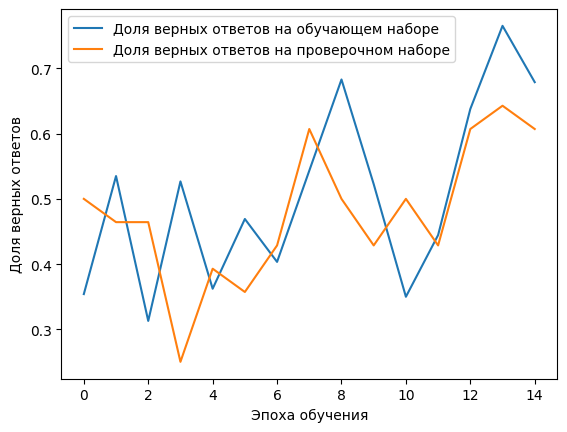

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

plt.legend()

plt.show()

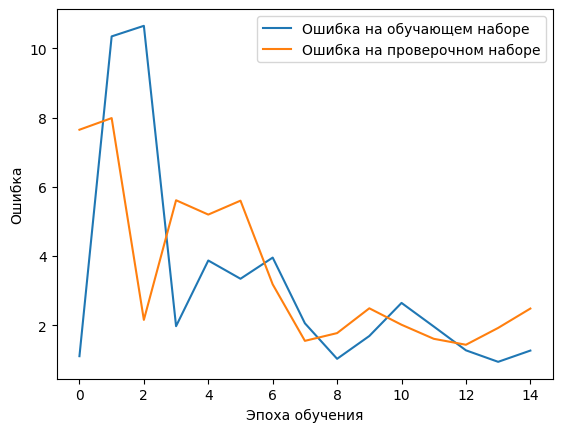

In [ ]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()

In [ ]:
scores = model.evaluate(x_test,
                        y_test,
                        verbose=0
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 65.0 %
